## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
#Normalizing the font sizes for the plots throughout the notebook
small = 14
meduim = 16
large = 18
plt.rc('font', size=small)          # controls default text sizes
plt.rc('axes', titlesize=small)     # fontsize of the axes title
plt.rc('axes', labelsize=meduim)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small)    # fontsize of the tick labels
plt.rc('legend', fontsize=small)    # legend fontsize
plt.rc('figure', titlesize=large)   # fontsize of the figure title
color = 'white' 
#Change the color of text in the plot according to your prefrence, 
#I had a dark theme on my notebook, so I set it to 'white'

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
X = np.linspace(0, 20)
a = -1
b = 2
Y = a*X+b
X = X.reshape(X.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)

In [4]:
print(f'X = \n{X.T}, \nY = \n{Y.T}')

X = 
[[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
   2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
   4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
   7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
   9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
  12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
  14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
  17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
  19.59183673 20.        ]], 
Y = 
[[  2.           1.59183673   1.18367347   0.7755102    0.36734694
   -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
   -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
   -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
   -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
   -8.20408163  -8.6122449   -9.02

#### Plot your data points. 

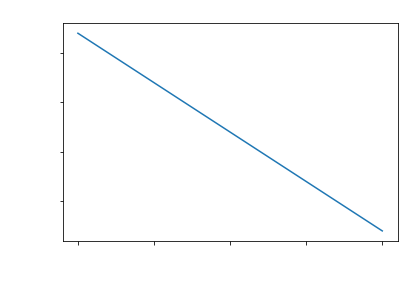

In [5]:
plt.plot(X, Y)
plt.title('X-Y Plot', color=color)
plt.xlabel('X', color=color)
plt.ylabel('Y', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

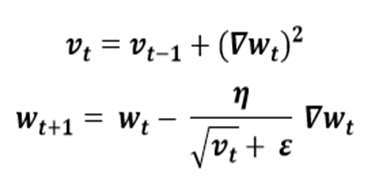

In [6]:
def AdaGrad_SVGD(X, Y, alpha, epsilon, iters, tol):
    x_points = X
    y_points = Y
    
    theta_0 = 0
    theta_1 = 0
    v_0 = 0
    v_1 = 1
    
    counter = 0
    list_j=[]
    list_h=[]
    list_thetas=[]

    h_theta = theta_0 + (theta_1*x_points)
    list_h.append(h_theta)
    j = ((1/2)*((h_theta - y_points)**2)).mean()
    list_j.append(j)
    j_prime_theta_0 = (h_theta - y_points).mean()
    j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
    v_0 += (j_prime_theta_0**2)
    v_1 += (j_prime_theta_1**2)
    theta_0 -= (alpha / (np.sqrt(v_0) + epsilon))*(j_prime_theta_0)
    theta_1 -= (alpha / (np.sqrt(v_1) + epsilon))*(j_prime_theta_1)
    thetas = [theta_0, theta_1]
    list_thetas.append(thetas)
    
    
    while(counter < iters):
        #Step 2 
        h_theta = theta_0 + (theta_1*x_points)
        list_h.append(h_theta)
        #Step 3
        j_old = j
        j = ((1/2)*((h_theta - y_points)**2)).mean()
        if abs(j - j_old) < 10**-tol:
            break
        list_j.append(j)
        #Step 4
        j_prime_theta_0 = (h_theta - y_points).mean()
        j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
        #Step 5
        v_0 = v_0 + (j_prime_theta_0**2)
        v_1 = v_1 + (j_prime_theta_1**2)
        
        theta_0 = theta_0 - (alpha / (np.sqrt(v_0) + epsilon))*(j_prime_theta_0)
        theta_1 = theta_1 - (alpha / (np.sqrt(v_1) + epsilon))*(j_prime_theta_1)
        
        thetas = [theta_0, theta_1]
        list_thetas.append(thetas)
        
        counter += 1
    print(f"theta_0 = {theta_0} \ntheta_1 = {theta_1}\nCost Function = {j} \nEpsilon = {epsilon} \nNumber of iterations = {counter}")
    return list_thetas, list_j, list_h, thetas

theta_0 = -0.565536600654686 
theta_1 = -0.5926508587231967
Cost Function = 4.019421601366043 
Epsilon = 1e-09 
Number of iterations = 1500
r2score_AdaGrad_SVGD_01 = 0.7685240547166897


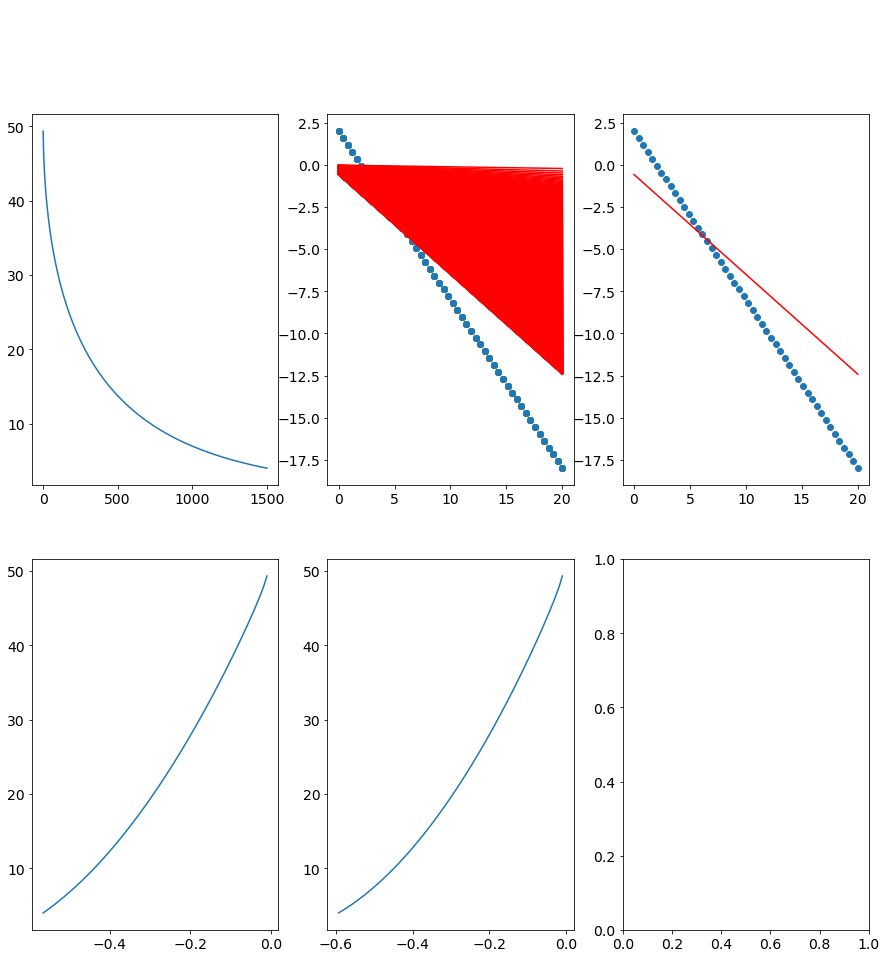

In [7]:
alpha_AdaGrad_SVGD_01 = 0.01
epsilon_AdaGrad_SVGD_01 = 1e-9
iters_AdaGrad_SVGD_01 = 1500
tol_AdaGrad_SVGD_01 = 4
l_thetas_AdaGrad_SVGD_01, l_j_AdaGrad_SVGD_01, h_AdaGrad_SVGD_01, thetas_AdaGrad_SVGD_01 = AdaGrad_SVGD(X, Y, alpha_AdaGrad_SVGD_01, epsilon_AdaGrad_SVGD_01, iters_AdaGrad_SVGD_01, tol_AdaGrad_SVGD_01)
y_predicted_AdaGrad_SVGD_01 = thetas_AdaGrad_SVGD_01[0] + (thetas_AdaGrad_SVGD_01[1]*X)
l_thetas_AdaGrad_SVGD_01 = np.array(l_thetas_AdaGrad_SVGD_01)

r2score_AdaGrad_SVGD_01 = r2_score(Y, y_predicted_AdaGrad_SVGD_01)
print(f'r2score_AdaGrad_SVGD_01 = {r2score_AdaGrad_SVGD_01}')

fig, axs = plt.subplots(2,3, figsize=(15, 15))
fig.suptitle("AdaGrad. Trial 01", color=color, fontsize=24)

axs[0,0].plot(range(len(l_j_AdaGrad_SVGD_01)), l_j_AdaGrad_SVGD_01)
axs[0,0].set_title('Loss_Epochs Plot', color=color);


axs[1,0].plot(l_thetas_AdaGrad_SVGD_01[:, 0], l_j_AdaGrad_SVGD_01)
axs[1,0].set_title('Theta_0-Loss Plot', color=color);

axs[1,1].plot(l_thetas_AdaGrad_SVGD_01[:, 1], l_j_AdaGrad_SVGD_01)
axs[1,1].set_title('Theta_1-Loss Plot', color=color);


for thets in l_thetas_AdaGrad_SVGD_01:
    y_predicted = thets[0] + (thets[1]*X)
    axs[0,1].scatter(X, Y)
    axs[0,1].plot(X, y_predicted, color='red')
    axs[0,1].set_title('Plot-Scatter Plot', color=color);
    
axs[0,2].scatter(X, Y)
axs[0,2].plot(X, y_predicted_AdaGrad_SVGD_01, color='red')
axs[0,2].set_title('Best Fit Plot-Scatter Plot', color=color);


theta_0 = 1.80611490588426 
theta_1 = -0.9852627585712392
Cost Function = 0.004849231879951173 
Epsilon = 1e-08 
Number of iterations = 2528
r2score_AdaGrad_SVGD = 0.9997204560445675
r2score_AdaGrad_SVGD_01 = 0.9997204560445675


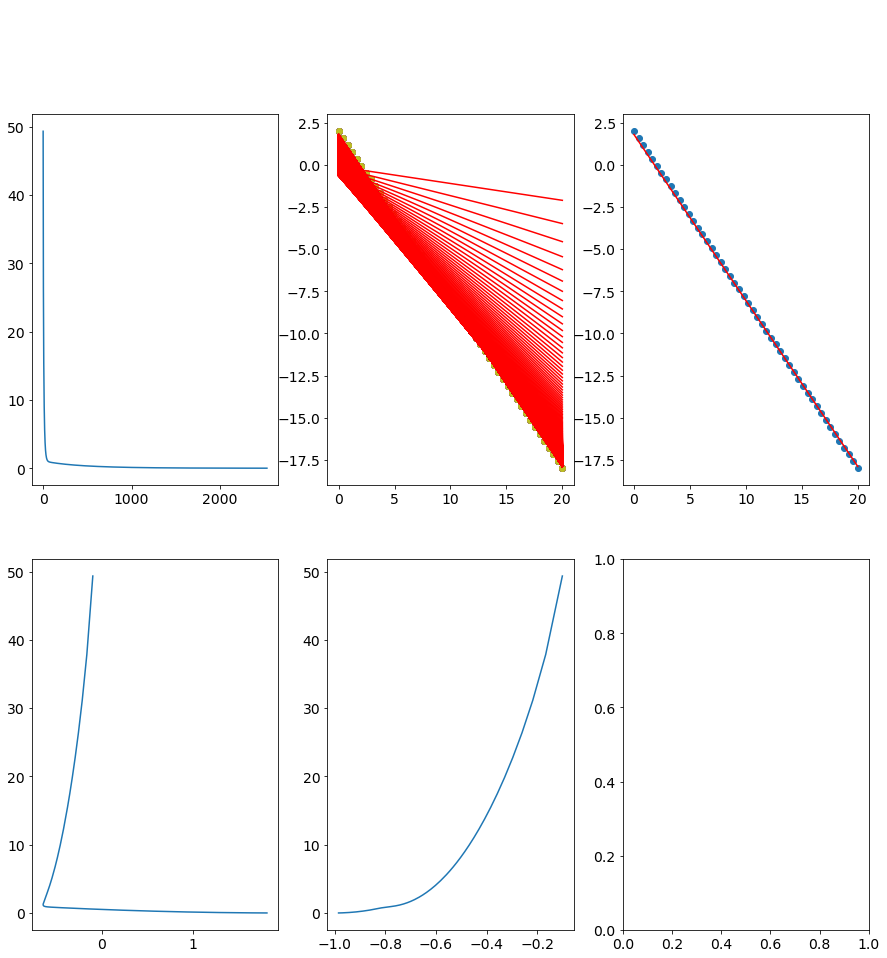

In [8]:
alpha_AdaGrad_SVGD = 0.1
epsilon_AdaGrad_SVGD = 1e-8
iters_AdaGrad_SVGD = 3000
tol_AdaGrad_SVGD = 5
l_thetas_AdaGrad_SVGD, l_j_AdaGrad_SVGD, h_AdaGrad_SVGD, thetas_AdaGrad_SVGD = AdaGrad_SVGD(X, Y, alpha_AdaGrad_SVGD, epsilon_AdaGrad_SVGD, iters_AdaGrad_SVGD, tol_AdaGrad_SVGD)
y_predicted_AdaGrad_SVGD= thetas_AdaGrad_SVGD[0] + (thetas_AdaGrad_SVGD[1]*X)
l_thetas_AdaGrad_SVGD = np.array(l_thetas_AdaGrad_SVGD)

r2score_AdaGrad_SVGD = r2_score(Y, y_predicted_AdaGrad_SVGD)
print(f'r2score_AdaGrad_SVGD = {r2score_AdaGrad_SVGD}')


r2score_AdaGrad_SVGD = r2_score(Y, y_predicted_AdaGrad_SVGD)
print(f'r2score_AdaGrad_SVGD_01 = {r2score_AdaGrad_SVGD}')

fig, axs = plt.subplots(2,3, figsize=(15, 15))
fig.suptitle("AdaGrad. Trial 02 - Best", color=color, fontsize=24)

axs[0,0].plot(range(len(l_j_AdaGrad_SVGD)), l_j_AdaGrad_SVGD)
axs[0,0].set_title('Loss_Epochs Plot', color=color);


axs[1,0].plot(l_thetas_AdaGrad_SVGD[:, 0], l_j_AdaGrad_SVGD)
axs[1,0].set_title('Theta_0-Loss Plot', color=color);

axs[1,1].plot(l_thetas_AdaGrad_SVGD[:, 1], l_j_AdaGrad_SVGD)
axs[1,1].set_title('Theta_1-Loss Plot', color=color);


for thets in l_thetas_AdaGrad_SVGD:
    y_predicted = thets[0] + (thets[1]*X)
    axs[0,1].scatter(X, Y)
    axs[0,1].plot(X, y_predicted, color='red')
    axs[0,1].set_title('Plot-Scatter Plot', color=color);
    
axs[0,2].scatter(X, Y)
axs[0,2].plot(X, y_predicted_AdaGrad_SVGD, color='red')
axs[0,2].set_title('Best Fit Plot-Scatter Plot', color=color);

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

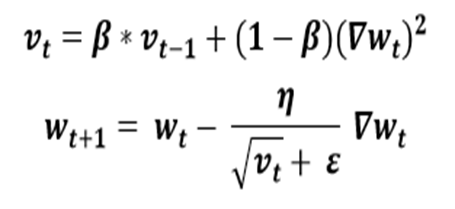

In [9]:
def RMSProp_SVGD(X, Y, alpha, epsilon, beta, iters, tol):
    x_points = X
    y_points = Y
    
    theta_0 = 0
    theta_1 = 0
    v_0 = 0
    v_1 = 1
    
    counter = 0
    list_j=[]
    list_h=[]
    list_thetas=[]

    h_theta = theta_0 + (theta_1*x_points)
    list_h.append(h_theta)
    j = ((1/2)*((h_theta - y_points)**2)).mean()
    list_j.append(j)
    j_prime_theta_0 = (h_theta - y_points).mean()
    j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
    v_0 = (beta*v_0) + ((1-beta)*(j_prime_theta_0**2))
    v_1 = (beta*v_1) + ((1-beta)*(j_prime_theta_1**2))
    theta_0 = theta_0 - (alpha / (np.sqrt(v_0) + epsilon))*(j_prime_theta_0)
    theta_1 = theta_1 - (alpha / (np.sqrt(v_1) + epsilon))*(j_prime_theta_1)
    thetas = [theta_0, theta_1]
    list_thetas.append(thetas)
    
    while(counter < iters):
        #Step 2 
        h_theta = theta_0 + (theta_1*x_points)
        list_h.append(h_theta)
        j_old = j
        #Step 3
        j = ((1/2)*((h_theta - y_points)**2)).mean()
        if abs(j - j_old) < 10**-tol:
            break
        list_j.append(j)
        #Step 4
        j_prime_theta_0 = (h_theta - y_points).mean()
        j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
        #Step 5
        v_0 = (beta*v_0) + ((1-beta)*(j_prime_theta_0**2))
        v_1 = (beta*v_1) + ((1-beta)*(j_prime_theta_1**2))
        
        theta_0 = theta_0 - (alpha / (np.sqrt(v_0) + epsilon))*(j_prime_theta_0)
        theta_1 = theta_1 - (alpha / (np.sqrt(v_1) + epsilon))*(j_prime_theta_1)
        
        thetas = [theta_0, theta_1]
        list_thetas.append(thetas)

        counter += 1
    print(f"theta_0 = {theta_0} \ntheta_1 = {theta_1}\nCost Function = {j} \nEpsilon = {epsilon} \nBeta = {beta} \nNumber of iterations = {counter}")
    return list_thetas, list_j, list_h, thetas

theta_0 = -0.4470710297861775 
theta_1 = -0.8187752314776574
Cost Function = 0.7718477321088932 
Epsilon = 1e-09 
Beta = 0.676 
Number of iterations = 1000
r2score_RMSProp_SVGD_01 = 0.9555416813556175


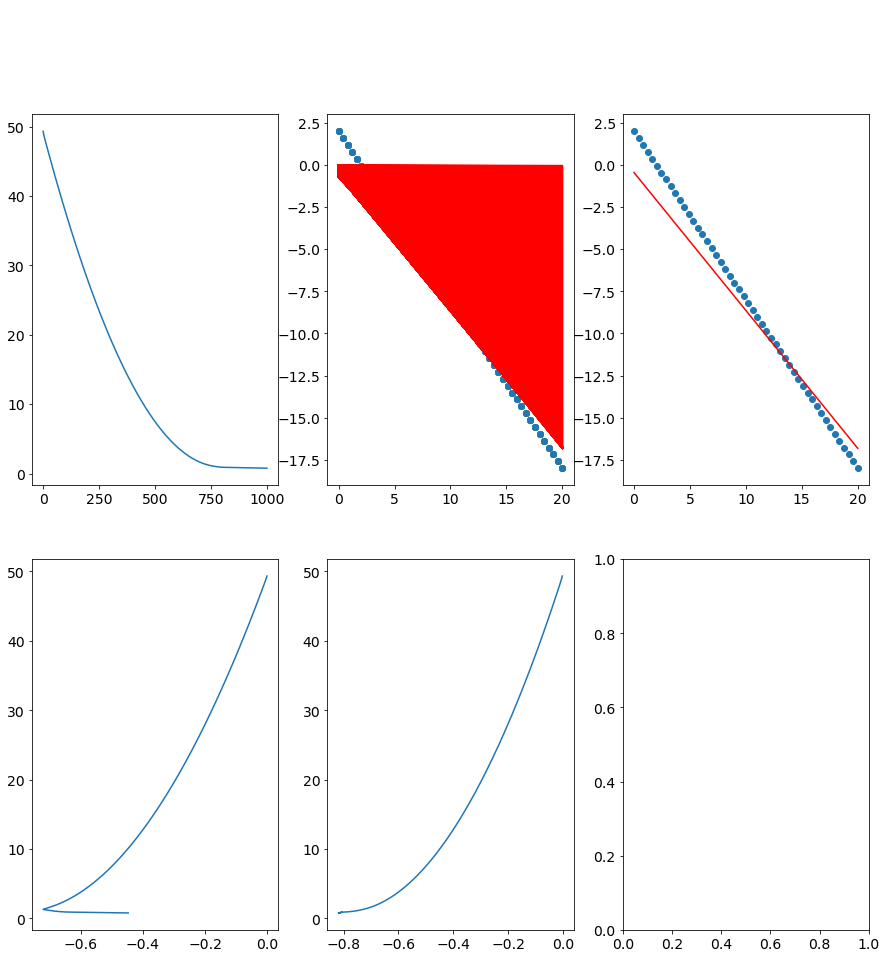

In [10]:
alpha_RMSProp_SVGD_01 = 0.001
epsilon_RMSProp_SVGD_01 = 1e-9
beta_RMSProp_SVGD_01 = 0.676
iters_RMSProp_SVGD_01 = 1000
tol_RMSProp_SVGD_01 = 6
l_thetas_RMSProp_SVGD_01, l_j_RMSProp_SVGD_01, list_h_RMSProp_SVGD_01, thetas_RMSProp_SVGD_01 = RMSProp_SVGD(X, Y, alpha_RMSProp_SVGD_01, epsilon_RMSProp_SVGD_01, beta_RMSProp_SVGD_01, iters_RMSProp_SVGD_01, tol_RMSProp_SVGD_01)
y_predicted_RMSProp_SVGD_01 = thetas_RMSProp_SVGD_01[0] + (thetas_RMSProp_SVGD_01[1]*X)
l_thetas_RMSProp_SVGD_01 = np.array(l_thetas_RMSProp_SVGD_01)

r2score_RMSProp_SVGD_01 = r2_score(Y, y_predicted_RMSProp_SVGD_01)
print(f'r2score_RMSProp_SVGD_01 = {r2score_RMSProp_SVGD_01}')


fig, axs = plt.subplots(2,3, figsize=(15, 15))
fig.suptitle("RMSProp. Trial 01", color=color, fontsize=24)

axs[0,0].plot(range(len(l_j_RMSProp_SVGD_01)), l_j_RMSProp_SVGD_01)
axs[0,0].set_title('Loss_Epochs Plot', color=color);


axs[1,0].plot(l_thetas_RMSProp_SVGD_01[:, 0], l_j_RMSProp_SVGD_01)
axs[1,0].set_title('Theta_0-Loss Plot', color=color);

axs[1,1].plot(l_thetas_RMSProp_SVGD_01[:, 1], l_j_RMSProp_SVGD_01)
axs[1,1].set_title('Theta_1-Loss Plot', color=color);


for thets in l_thetas_RMSProp_SVGD_01:
    y_predicted = thets[0] + (thets[1]*X)
    axs[0,1].scatter(X, Y)
    axs[0,1].plot(X, y_predicted, color='red')
    axs[0,1].set_title('Plot-Scatter Plot', color=color);
    
axs[0,2].scatter(X, Y)
axs[0,2].plot(X, y_predicted_RMSProp_SVGD_01, color='red')
axs[0,2].set_title('Best Fit Plot-Scatter Plot', color=color);

theta_0 = 1.9872384209595373 
theta_1 = -0.9984924951117989
Cost Function = 4.209822114484935e-05 
Epsilon = 1e-08 
Beta = 0.95 
Number of iterations = 110
r2score_RMSProp_SVGD = 0.9999975731613693


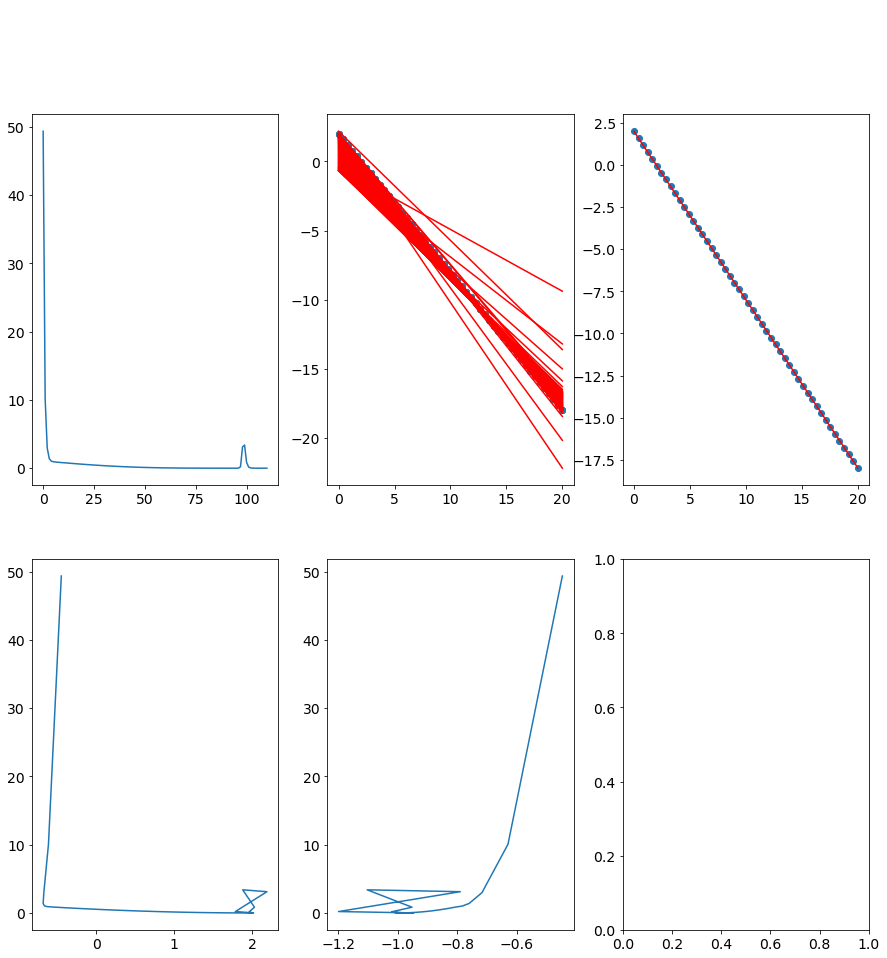

In [11]:
alpha_RMSProp_SVGD = 0.1
epsilon_RMSProp_SVGD = 1e-8
beta_RMSProp_SVGD = 0.95
iters_RMSProp_SVGD = 2000
tol_RMSProp_SVGD = 5
l_thetas_RMSProp_SVGD, l_j_RMSProp_SVGD, list_h_RMSProp_SVGD, thetas_RMSProp_SVGD = RMSProp_SVGD(X, Y, alpha_RMSProp_SVGD, epsilon_RMSProp_SVGD, beta_RMSProp_SVGD, iters_RMSProp_SVGD, tol_RMSProp_SVGD)
y_predicted_RMSProp_SVGD = thetas_RMSProp_SVGD[0] + (thetas_RMSProp_SVGD[1]*X)
l_thetas_RMSProp_SVGD = np.array(l_thetas_RMSProp_SVGD)

r2score_RMSProp_SVGD = r2_score(Y, y_predicted_RMSProp_SVGD)
print(f'r2score_RMSProp_SVGD = {r2score_RMSProp_SVGD}')

fig, axs = plt.subplots(2,3, figsize=(15, 15))
fig.suptitle("RMSProp. Trial 02 - Best", color=color, fontsize=24)

axs[0,0].plot(range(len(l_j_RMSProp_SVGD)), l_j_RMSProp_SVGD)
axs[0,0].set_title('Loss_Epochs Plot', color=color);


axs[1,0].plot(l_thetas_RMSProp_SVGD[:, 0], l_j_RMSProp_SVGD)
axs[1,0].set_title('Theta_0-Loss Plot', color=color);

axs[1,1].plot(l_thetas_RMSProp_SVGD[:, 1], l_j_RMSProp_SVGD)
axs[1,1].set_title('Theta_1-Loss Plot', color=color);


for thets in l_thetas_RMSProp_SVGD:
    y_predicted = thets[0] + (thets[1]*X)
    axs[0,1].scatter(X, Y)
    axs[0,1].plot(X, y_predicted, color='red')
    axs[0,1].set_title('Plot-Scatter Plot', color=color);
    
axs[0,2].scatter(X, Y)
axs[0,2].plot(X, y_predicted_RMSProp_SVGD, color='red')
axs[0,2].set_title('Best Fit Plot-Scatter Plot', color=color);

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

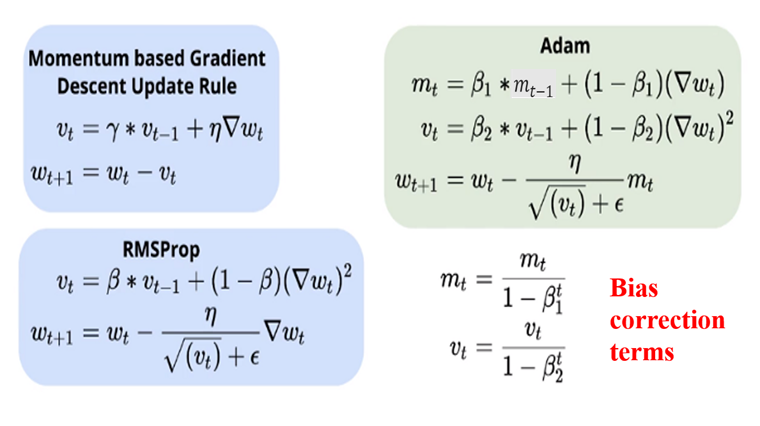

In [12]:
def ADAM_SVGD(X, Y, alpha, epsilon, beta1, beta2, iters, tol):
    x_points = X
    y_points = Y
    
    theta_0 = 0
    theta_1 = 0
    v_0 = 0
    v_1 = 1
    m_0 = 0
    m_1 = 0
    
    counter = 0
    list_j=[]
    list_h=[]
    list_thetas=[]
    
    h_theta = theta_0 + (theta_1*x_points)
    list_h.append(h_theta)
    j = ((1/2)*((h_theta - y_points)**2)).mean()
    list_j.append(j)
    j_prime_theta_0 = (h_theta - y_points).mean()
    j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
    m_0 = (beta1*m_0) + ((1-beta1)*(j_prime_theta_0))
    m_1 = (beta1*m_1) + ((1-beta1)*(j_prime_theta_1))
    v_0 = (beta2*v_0) + ((1-beta2)*(j_prime_theta_0**2))
    v_1 = (beta2*v_1) + ((1-beta2)*(j_prime_theta_1**2))
    theta_0 = theta_0 - (alpha / (np.sqrt(v_0) + epsilon))*(m_0)
    theta_1 = theta_1 - (alpha / (np.sqrt(v_1) + epsilon))*(m_1)
    thetas = [theta_0, theta_1]
    list_thetas.append(thetas)
        
    while(counter < iters):
        #Step 2 
        h_theta = theta_0 + (theta_1*x_points)
        list_h.append(h_theta)
        j_old = j
        #Step 3
        j = ((1/2)*((h_theta - y_points)**2)).mean()
        if abs(j - j_old) < 10**-tol:
            break
        list_j.append(j)
        #Step 4
        j_prime_theta_0 = (h_theta - y_points).mean()
        j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
        #Step 5
        m_0 = (beta1*m_0) + ((1-beta1)*(j_prime_theta_0))
        m_1 = (beta1*m_1) + ((1-beta1)*(j_prime_theta_1))
        
        v_0 = (beta2*v_0) + ((1-beta2)*(j_prime_theta_0**2))
        v_1 = (beta2*v_1) + ((1-beta2)*(j_prime_theta_1**2))
        if counter > 0:
            
            m_0 = (m_0 / (1 - beta1**counter))
            m_1 = (m_1 / (1 - beta1**counter))

            v_0 = (v_0 / (1 - beta2**counter))
            v_1 = (v_1 / (1 - beta2**counter))
        
        theta_0 = theta_0 - (alpha / (np.sqrt(v_0) + epsilon))*(m_0)
        theta_1 = theta_1 - (alpha / (np.sqrt(v_1) + epsilon))*(m_1)
        
        thetas = [theta_0, theta_1]
        list_thetas.append(thetas)

        counter += 1
    print(f"theta_0 = {theta_0} \ntheta_1 = {theta_1}\nCost Function = {j} \alpha = {alpha} \nEpsilon = {epsilon} \nBeta1 = {beta1} \nBeta2 = {beta2} \nNumber of iterations = {counter}")
    return list_thetas, list_j, list_h, thetas

theta_0 = -0.04937276884571965 
theta_1 = -0.049373677532163304
Cost Function = 43.49036885234694 lpha = 0.0001 
Epsilon = 1e-07 
Beta1 = 0.67 
Beta2 = 0.78 
Number of iterations = 500
r2score_ADAM_SVGD_01 = -1.5064289627593777


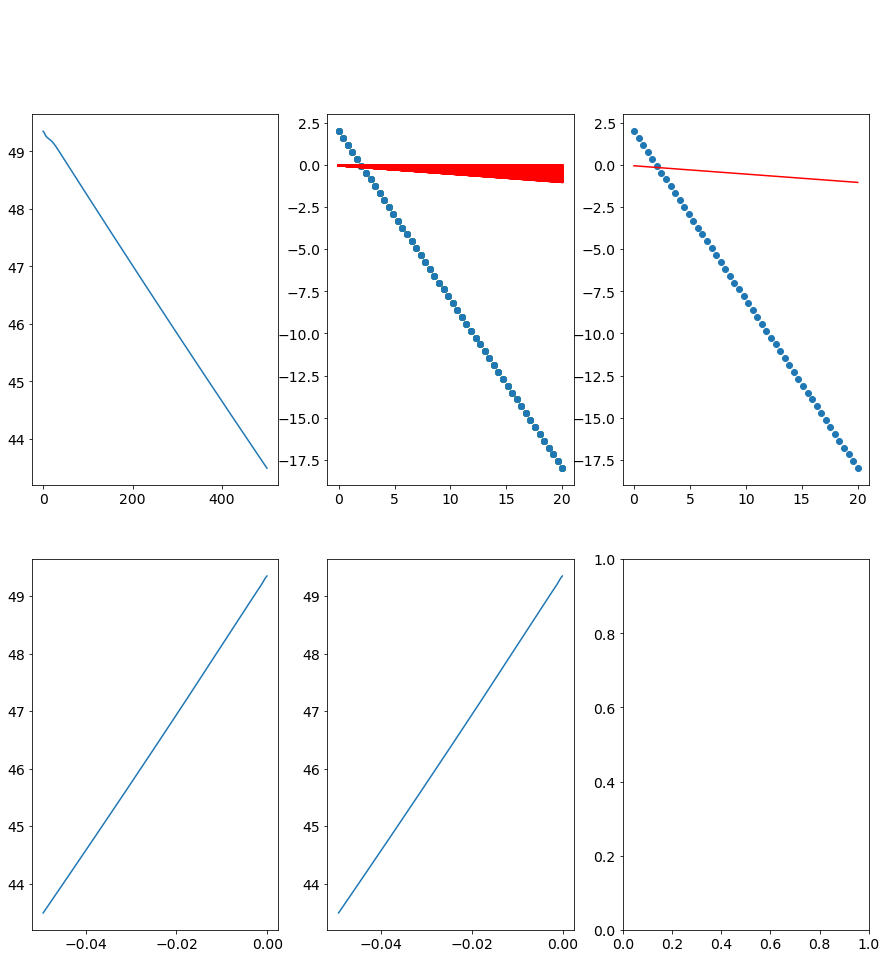

In [13]:
alpha_ADAM_SVGD_01 = 0.0001
epsilon_ADAM_SVGD_01 = 1e-7
beta1_ADAM_SVGD_01 = 0.67
beta2_ADAM_SVGD_01 = 0.78
iters_ADAM_SVGD_01 = 500
tol_ADAM_SVGD_01 = 6
l_thetas_ADAM_SVGD_01, l_j_ADAM_SVGD_01, l_h_ADAM_SVGD_01, thetas_ADAM_SVGD_01 = ADAM_SVGD(X, Y, alpha_ADAM_SVGD_01, epsilon_ADAM_SVGD_01, beta1_ADAM_SVGD_01, beta2_ADAM_SVGD_01, iters_ADAM_SVGD_01, tol_ADAM_SVGD_01)
y_predicted_ADAM_SVGD_01 = thetas_ADAM_SVGD_01[0] + (thetas_ADAM_SVGD_01[1]*X)
l_thetas_ADAM_SVGD_01 = np.array(l_thetas_ADAM_SVGD_01)

r2score_ADAM_SVGD_01 = r2_score(Y, y_predicted_ADAM_SVGD_01)
print(f'r2score_ADAM_SVGD_01 = {r2score_ADAM_SVGD_01}')


fig, axs = plt.subplots(2,3, figsize=(15, 15))
fig.suptitle("ADAM Trial 01", color=color, fontsize=24)

axs[0,0].plot(range(len(l_j_ADAM_SVGD_01)), l_j_ADAM_SVGD_01)
axs[0,0].set_title('Loss_Epochs Plot', color=color);


axs[1,0].plot(l_thetas_ADAM_SVGD_01[:, 0], l_j_ADAM_SVGD_01)
axs[1,0].set_title('Theta_0-Loss Plot', color=color);

axs[1,1].plot(l_thetas_ADAM_SVGD_01[:, 1], l_j_ADAM_SVGD_01)
axs[1,1].set_title('Theta_1-Loss Plot', color=color);


for thets in l_thetas_ADAM_SVGD_01:
    y_predicted = thets[0] + (thets[1]*X)
    axs[0,1].scatter(X, Y)
    axs[0,1].plot(X, y_predicted, color='red')
    axs[0,1].set_title('Plot-Scatter Plot', color=color);
    
axs[0,2].scatter(X, Y)
axs[0,2].plot(X, y_predicted_ADAM_SVGD_01, color='red')
axs[0,2].set_title('Best Fit Plot-Scatter Plot', color=color);

theta_0 = 2.06376270733467 
theta_1 = -1.0047458245105376
Cost Function = 0.0005236202492339788 lpha = 0.1 
Epsilon = 1e-08 
Beta1 = 0.9 
Beta2 = 0.9502 
Number of iterations = 691
r2score_ADAM_SVGD = 0.9999698148326912


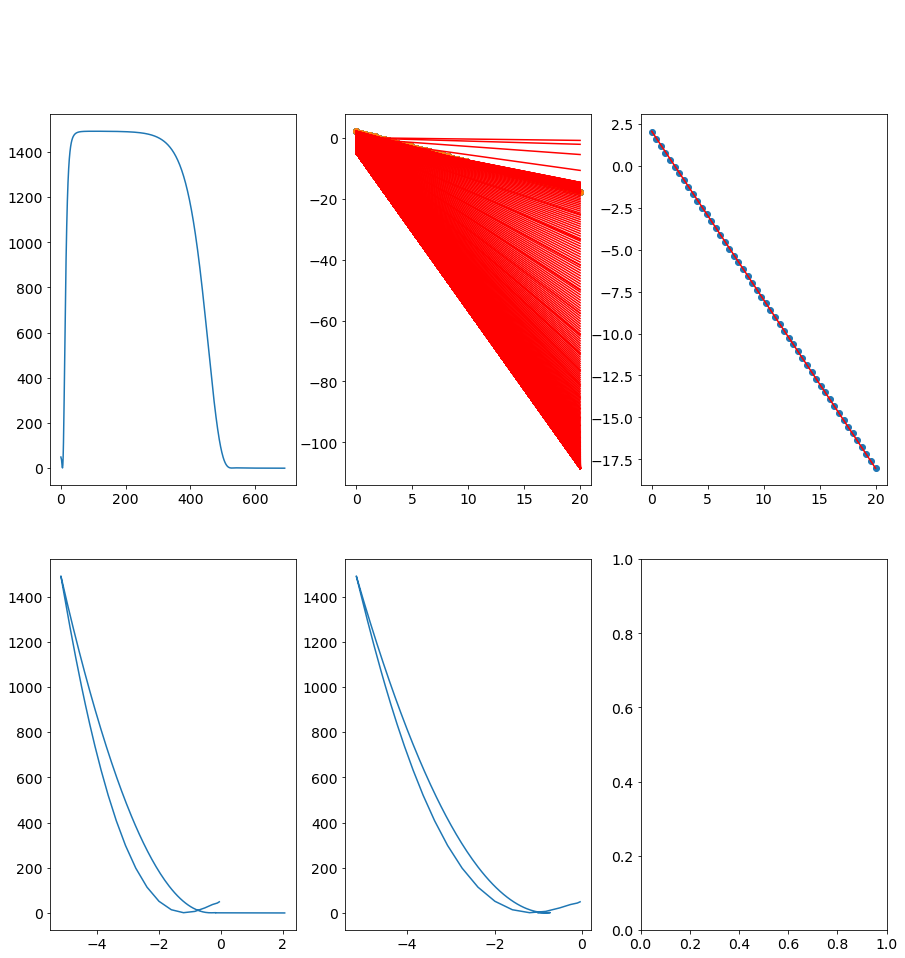

In [14]:
alpha_ADAM_SVGD = 0.1
epsilon_ADAM_SVGD = 1e-8
beta1_ADAM_SVGD = 0.9
beta2_ADAM_SVGD = 0.9502
iters_ADAM_SVGD = 2000
tol_ADAM_SVGD = 5
l_thetas_ADAM_SVGD, l_j_ADAM_SVGD,l_h_ADAM_SVGD, thetas_ADAM_SVGD = ADAM_SVGD(X, Y, alpha_ADAM_SVGD, epsilon_ADAM_SVGD, beta1_ADAM_SVGD, beta2_ADAM_SVGD, iters_ADAM_SVGD, tol_ADAM_SVGD)
y_predicted_ADAM_SVGD = thetas_ADAM_SVGD[0] + (thetas_ADAM_SVGD[1]*X)
l_thetas_ADAM_SVGD = np.array(l_thetas_ADAM_SVGD)

r2score_ADAM_SVGD = r2_score(Y, y_predicted_ADAM_SVGD)
print(f'r2score_ADAM_SVGD = {r2score_ADAM_SVGD}')

fig, axs = plt.subplots(2,3, figsize=(15, 15))
fig.suptitle("ADAM Trial 02 - Best", color=color, fontsize=24)

axs[0,0].plot(range(len(l_j_ADAM_SVGD)), l_j_ADAM_SVGD)
axs[0,0].set_title('Loss_Epochs Plot', color=color);


axs[1,0].plot(l_thetas_ADAM_SVGD[:, 0], l_j_ADAM_SVGD)
axs[1,0].set_title('Theta_0-Loss Plot', color=color);

axs[1,1].plot(l_thetas_ADAM_SVGD[:, 1], l_j_ADAM_SVGD)
axs[1,1].set_title('Theta_1-Loss Plot', color=color);


for thets in l_thetas_ADAM_SVGD:
    y_predicted = thets[0] + (thets[1]*X)
    axs[0,1].scatter(X, Y)
    axs[0,1].plot(X, y_predicted, color='red')
    axs[0,1].set_title('Plot-Scatter Plot', color=color);
    
axs[0,2].scatter(X, Y)
axs[0,2].plot(X, y_predicted_ADAM_SVGD, color='red')
axs[0,2].set_title('Best Fit Plot-Scatter Plot', color=color);

# Comparison

* Alpha = 0.1
* Epsilon = 1e-8
* Beta = Beta1 = 0.9
* Beta2 = 0.95
* Maximum Number of Iterations = 1500
* Tolerance = 1e-5

theta_0 = 1.4406675953511363 
theta_1 = -0.9574780773051652
Cost Function = 0.04044205615043633 
Epsilon = 1e-08 
Number of iterations = 1500
r2score_AdaGrad_SVGD_Comp = 0.9976734561625618
r2score_AdaGrad_SVGD_01 = 0.9976734561625618


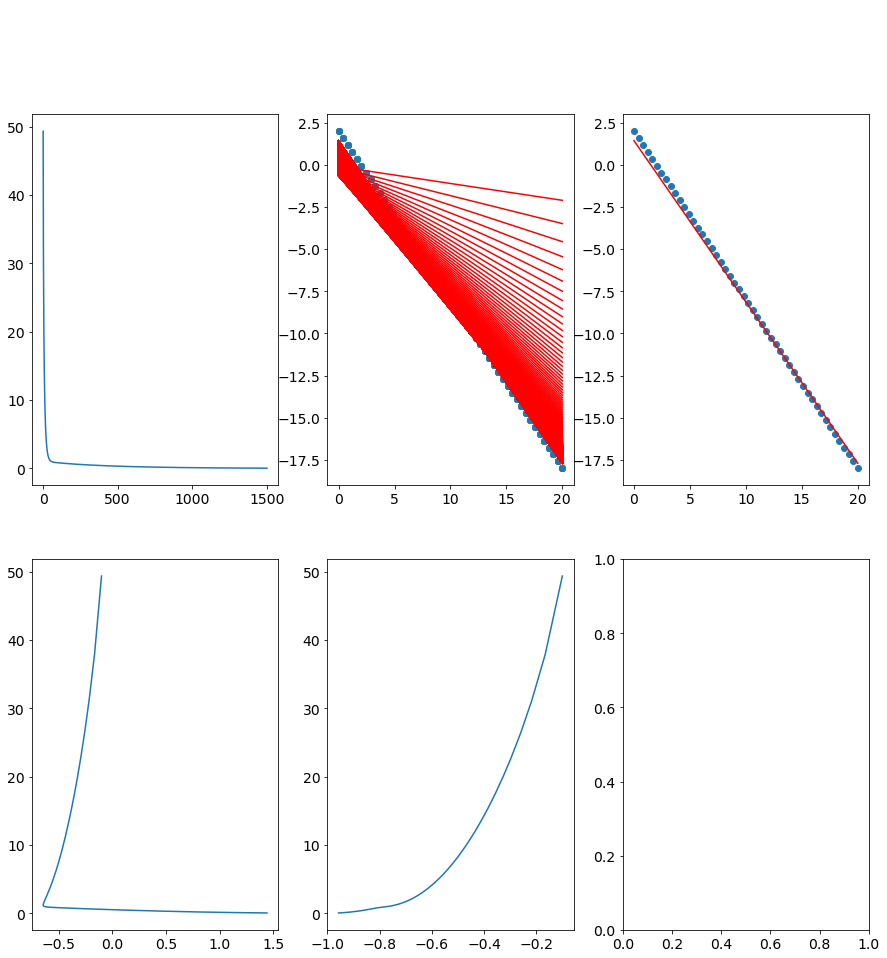

In [15]:
#ADAGrad
alpha_AdaGrad_SVGD_Comp = 0.1
epsilon_AdaGrad_SVGD_Comp = 1e-8
iters_AdaGrad_SVGD_Comp = 1500
tol_AdaGrad_SVGD_Comp = 5
l_thetas_AdaGrad_SVGD_Comp, l_j_AdaGrad_SVGD_Comp, h_AdaGrad_SVGD_Comp, thetas_AdaGrad_SVGD_Comp = AdaGrad_SVGD(X, Y, alpha_AdaGrad_SVGD_Comp, epsilon_AdaGrad_SVGD_Comp, iters_AdaGrad_SVGD_Comp, tol_AdaGrad_SVGD_Comp)
y_predicted_AdaGrad_SVGD_Comp = thetas_AdaGrad_SVGD_Comp[0] + (thetas_AdaGrad_SVGD_Comp[1]*X)
l_thetas_AdaGrad_SVGD_Comp = np.array(l_thetas_AdaGrad_SVGD_Comp)

r2score_AdaGrad_SVGD_Comp = r2_score(Y, y_predicted_AdaGrad_SVGD_Comp)
print(f'r2score_AdaGrad_SVGD_Comp = {r2score_AdaGrad_SVGD_Comp}')


r2score_AdaGrad_SVGD_Comp = r2_score(Y, y_predicted_AdaGrad_SVGD_Comp)
print(f'r2score_AdaGrad_SVGD_01 = {r2score_AdaGrad_SVGD_Comp}')

fig, axs = plt.subplots(2,3, figsize=(15, 15))
fig.suptitle("AdaGrad.", color=color, fontsize=24)

axs[0,0].plot(range(len(l_j_AdaGrad_SVGD_Comp)), l_j_AdaGrad_SVGD_Comp)
axs[0,0].set_title('Loss_Epochs Plot', color=color);


axs[1,0].plot(l_thetas_AdaGrad_SVGD_Comp[:, 0], l_j_AdaGrad_SVGD_Comp)
axs[1,0].set_title('Theta_0-Loss Plot', color=color);

axs[1,1].plot(l_thetas_AdaGrad_SVGD_Comp[:, 1], l_j_AdaGrad_SVGD_Comp)
axs[1,1].set_title('Theta_1-Loss Plot', color=color);


for thets in l_thetas_AdaGrad_SVGD_Comp:
    y_predicted = thets[0] + (thets[1]*X)
    axs[0,1].scatter(X, Y)
    axs[0,1].plot(X, y_predicted, color='red')
    axs[0,1].set_title('Plot-Scatter Plot', color=color);
    
axs[0,2].scatter(X, Y)
axs[0,2].plot(X, y_predicted_AdaGrad_SVGD_Comp, color='red')
axs[0,2].set_title('Best Fit Plot-Scatter Plot', color=color);

theta_0 = 1.9495618872892138 
theta_1 = -1.050040219016504
Cost Function = 0.19514966231650682 
Epsilon = 1e-08 
Beta = 0.9 
Number of iterations = 209
r2score_RMSProp_SVGD_Comp = 0.9887501959370484


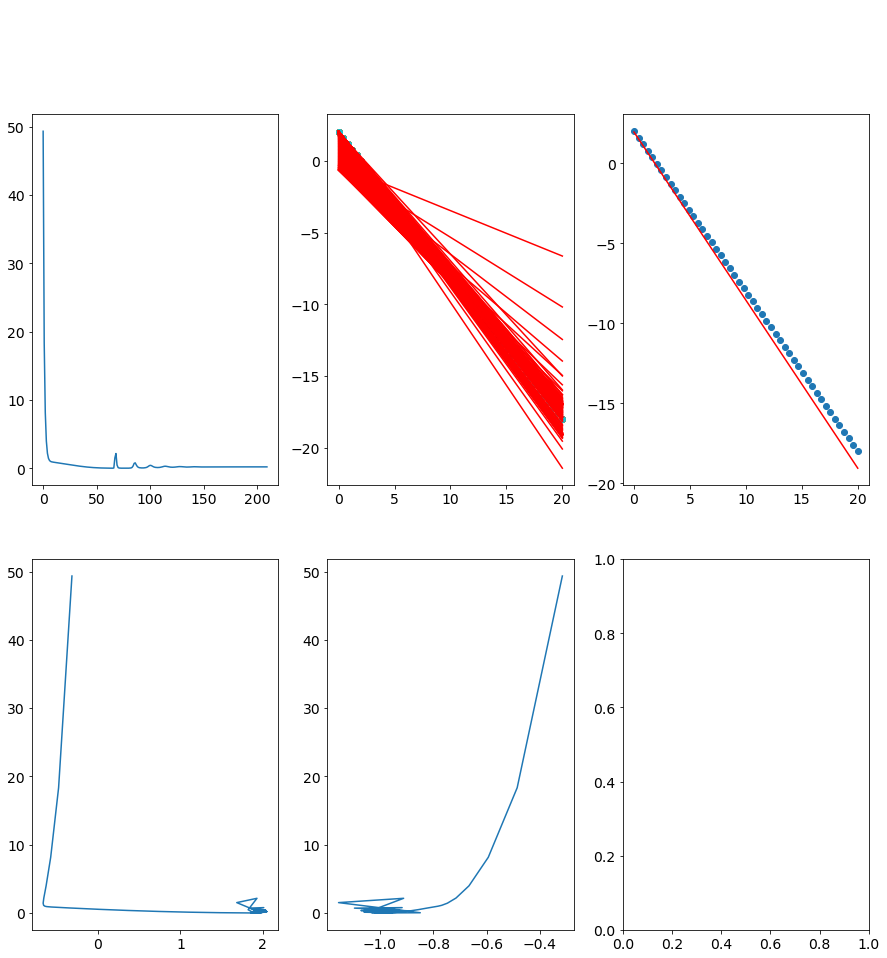

In [16]:
#RMSProp.
alpha_RMSProp_SVGD_Comp = 0.1
epsilon_RMSProp_SVGD_Comp = 1e-8
beta_RMSProp_SVGD_Comp = 0.9
iters_RMSProp_SVGD_Comp = 1500
tol_RMSProp_SVGD_Comp = 5
l_thetas_RMSProp_SVGD_Comp, l_j_RMSProp_SVGD_Comp, list_h_RMSProp_SVGD_Comp, thetas_RMSProp_SVGD_Comp = RMSProp_SVGD(X, Y, alpha_RMSProp_SVGD_Comp, epsilon_RMSProp_SVGD_Comp, beta_RMSProp_SVGD_Comp, iters_RMSProp_SVGD_Comp, tol_RMSProp_SVGD_Comp)
y_predicted_RMSProp_SVGD_Comp = thetas_RMSProp_SVGD_Comp[0] + (thetas_RMSProp_SVGD_Comp[1]*X)
l_thetas_RMSProp_SVGD_Comp = np.array(l_thetas_RMSProp_SVGD_Comp)

r2score_RMSProp_SVGD_Comp = r2_score(Y, y_predicted_RMSProp_SVGD_Comp)
print(f'r2score_RMSProp_SVGD_Comp = {r2score_RMSProp_SVGD_Comp}')

fig, axs = plt.subplots(2,3, figsize=(15, 15))
fig.suptitle("RMSProp.", color=color, fontsize=24)

axs[0,0].plot(range(len(l_j_RMSProp_SVGD_Comp)), l_j_RMSProp_SVGD_Comp)
axs[0,0].set_title('Loss_Epochs Plot', color=color);


axs[1,0].plot(l_thetas_RMSProp_SVGD_Comp[:, 0], l_j_RMSProp_SVGD_Comp)
axs[1,0].set_title('Theta_0-Loss Plot', color=color);

axs[1,1].plot(l_thetas_RMSProp_SVGD_Comp[:, 1], l_j_RMSProp_SVGD_Comp)
axs[1,1].set_title('Theta_1-Loss Plot', color=color);


for thets in l_thetas_RMSProp_SVGD_Comp:
    y_predicted = thets[0] + (thets[1]*X)
    axs[0,1].scatter(X, Y)
    axs[0,1].plot(X, y_predicted, color='red')
    axs[0,1].set_title('Plot-Scatter Plot', color=color);
    
axs[0,2].scatter(X, Y)
axs[0,2].plot(X, y_predicted_RMSProp_SVGD_Comp, color='red')
axs[0,2].set_title('Best Fit Plot-Scatter Plot', color=color);

theta_0 = 2.0075988497596327 
theta_1 = -1.000490556432748
Cost Function = 7.80135793715385e-06 lpha = 0.1 
Epsilon = 1e-08 
Beta1 = 0.9 
Beta2 = 0.95 
Number of iterations = 674
r2score_ADAM_SVGD_Comp = 0.9999995502746601


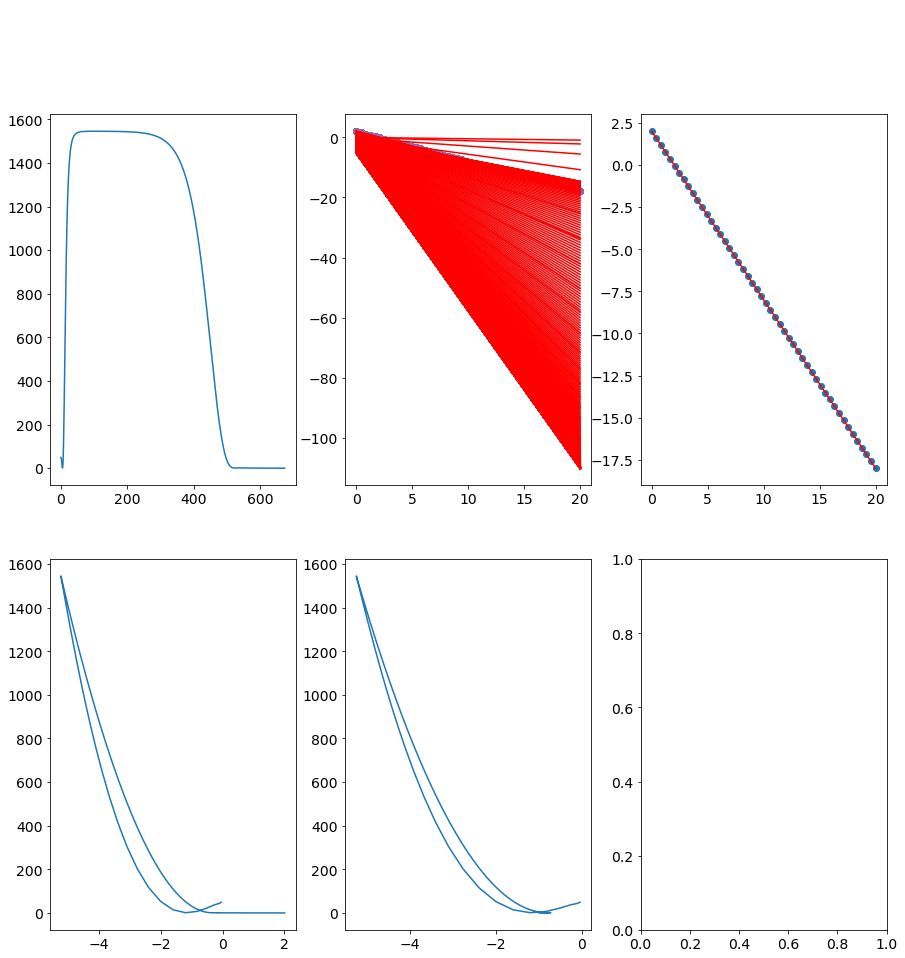

In [17]:
#ADAM
alpha_ADAM_SVGD_Comp = 0.1
epsilon_ADAM_SVGD_Comp = 1e-8
beta1_ADAM_SVGD_Comp = 0.9
beta2_ADAM_SVGD_Comp = 0.95
iters_ADAM_SVGD_Comp = 1500
tol_ADAM_SVGD_Comp = 5
l_thetas_ADAM_SVGD_Comp, l_j_ADAM_SVGD_Comp, l_h_ADAM_SVGD_Comp, thetas_ADAM_SVGD_Comp = ADAM_SVGD(X, Y, alpha_ADAM_SVGD_Comp, epsilon_ADAM_SVGD_Comp, beta1_ADAM_SVGD_Comp, beta2_ADAM_SVGD_Comp, iters_ADAM_SVGD_Comp, tol_ADAM_SVGD_Comp)
y_predicted_ADAM_SVGD_Comp = thetas_ADAM_SVGD_Comp[0] + (thetas_ADAM_SVGD_Comp[1]*X)
l_thetas_ADAM_SVGD_Comp = np.array(l_thetas_ADAM_SVGD_Comp)

r2score_ADAM_SVGD_Comp = r2_score(Y, y_predicted_ADAM_SVGD_Comp)
print(f'r2score_ADAM_SVGD_Comp = {r2score_ADAM_SVGD_Comp}')

fig, axs = plt.subplots(2,3, figsize=(15, 15))
fig.suptitle("ADAM", color=color, fontsize=24)

axs[0,0].plot(range(len(l_j_ADAM_SVGD_Comp)), l_j_ADAM_SVGD_Comp)
axs[0,0].set_title('Loss_Epochs Plot', color=color);


axs[1,0].plot(l_thetas_ADAM_SVGD_Comp[:, 0], l_j_ADAM_SVGD_Comp)
axs[1,0].set_title('Theta_0-Loss Plot', color=color);

axs[1,1].plot(l_thetas_ADAM_SVGD_Comp[:, 1], l_j_ADAM_SVGD_Comp)
axs[1,1].set_title('Theta_1-Loss Plot', color=color);


for thets in l_thetas_ADAM_SVGD_Comp:
    y_predicted = thets[0] + (thets[1]*X)
    axs[0,1].scatter(X, Y)
    axs[0,1].plot(X, y_predicted, color='red')
    axs[0,1].set_title('Plot-Scatter Plot', color=color);
    
axs[0,2].scatter(X, Y)
axs[0,2].plot(X, y_predicted_ADAM_SVGD_Comp, color='red')
axs[0,2].set_title('Best Fit Plot-Scatter Plot', color=color);

## Congratulations 
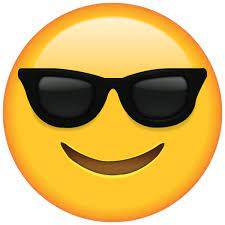